In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [310]:
# 导入分钟数据：
data_location = "C:/Users/workspace/SH_tongliang/database/bitmex1m_11_6_2018数据/"
file1 = "ethu18z18_1m.csv"
file2 = "bchu18z18_1m.csv"
file3 = "adau18z18_1m.csv"
file4 = "eosu18z18_1m.csv"
file5 = "ltcu18z18_1m.csv"
file6 = "trxu18z18_1m.csv"
file7 = "xbtusd_1m.csv"
file8 = "xrpu18z18_1m.csv"

# Import ranking file
root = "C:/Users/workspace/SH_tongliang/"
rank_file = "rank.csv"
rank = pd.read_csv(root+rank_file)
rank.columns = ['Date', 'XRP', 'BTC', 'BCH', 'LTC', 'EOS', 'ADA', 'TRX', 'ETH']

def preprocess(data_location, file):
    df = pd.read_csv(data_location + file)
    df.columns = ['time', 'open', 'high', 'low', 'close', 'volume']
    df.index = pd.to_datetime(df['time'])
    return df

def resample(df, period):
    convrted_df = df.resample(period).last()
    convrted_df['close'] = df['close'].resample(period).last()
    # Keep rows with at least 5 non-NaN values
    convrted_df.dropna(thresh=5, inplace=True)
#     convrted_df.index = convrted_df['time']
    return convrted_df


In [311]:
rank

,Date,XRP,BTC,BCH,LTC,EOS,ADA,TRX,ETH
0,2018-10-26,7,6,5,3,2,1,0,4
1,2018-10-27,7,5,2,3,4,1,0,6
2,2018-10-28,7,5,0,3,4,1,2,6
3,2018-10-29,6,3,1,2,5,0,4,7
4,2018-10-30,6,5,2,0,4,3,1,7
5,2018-10-31,6,5,3,1,4,2,0,7
6,2018-11-1,7,3,6,1,4,2,0,5
7,2018-11-2,4,2,7,5,6,0,3,1
8,2018-11-3,2,1,7,5,3,6,4,0
9,2018-11-4,1,0,7,5,3,6,4,2


In [312]:
df1 = preprocess(data_location, file1)
df2 = preprocess(data_location, file2)
df3 = preprocess(data_location, file3)
df4 = preprocess(data_location, file4)
df5 = preprocess(data_location, file5)
df6 = preprocess(data_location, file6)
df7 = preprocess(data_location, file7)
df8 = preprocess(data_location, file8)

In [313]:
def get_resampled_df(df):
    close = df[['close']]
    close_res = close.resample('D').last()
    close_res['pct_chg'] = close_res['close'].pct_change()
    return close_res

# Need to be shifted
# def print_correction_rate(asst, rank_df, close_res_df):
#     rank_asst = rank[['Date',asst]]
#     rank_asst.index = rank_asst['Date']
#     del rank_asst['Date']
#     rank_asst.index = pd.to_datetime(rank_asst.index)
#     rank_asst['date'] = rank_asst.index.astype(str)
#     close_res_df['date'] = close_res_df.index.astype(str)
#     merged = rank_asst.merge(close_res_df, on = 'date')
#     merged['next_day_pct'] = merged['pct_chg'].shift(-1)
#     merged.dropna(inplace=True)
#     print ("数字货币： ", merged.columns[0])
#     print ("检验时间段：",merged['date'].values[0]," to ",merged['date'].values[-1])
#     # correct prediction rate:
#     try:
#         correct_long_prdct = len(merged[((merged[asst] == 7) | (merged[asst] == 6) | (merged[asst] == 5)) &(merged['pct_chg']>0)])/len(merged[((merged[asst] == 7) | (merged[asst] == 6) | (merged[asst] == 5))])
#     except ZeroDivisionError:
#         print (print ('没有过做多信号'))
#     else:
#         print ("预测准确率：多头",correct_long_prdct)
        
#     try:    
#         correct_short_prdct = len(merged[((merged[asst] == 0) | (merged[asst] == 1) | (merged[asst] == 2)) &(merged['pct_chg']<0)])/len(merged[((merged[asst] == 0) | (merged[asst] == 1) | (merged[asst] == 2))])    
#     except ZeroDivisionError:
#         print (print ('没有过做空信号'))
#     else:      
#         print ("预测准确率：空头",correct_short_prdct)

def print_correction_rate(asst, rank_df, close_res_df):
    rank_asst = rank[['Date',asst]]
    rank_asst.index = rank_asst['Date']
    del rank_asst['Date']
    rank_asst.index = pd.to_datetime(rank_asst.index)
    rank_asst['date'] = rank_asst.index.astype(str)
    close_res_df['date'] = close_res_df.index.astype(str)
    merged = rank_asst.merge(close_res_df, on = 'date')
    merged['next_day_pct'] = merged['pct_chg']
    merged.dropna(inplace=True)
    print ("数字货币： ", merged.columns[0])
    print ("检验时间段：",merged['date'].values[0]," to ",merged['date'].values[-1])
    # correct prediction rate:
    try:
        correct_long_prdct = len(merged[((merged[asst] == 7) | (merged[asst] == 6) | (merged[asst] == 5)) &(merged['pct_chg']>0)])/len(merged[((merged[asst] == 7) | (merged[asst] == 6) | (merged[asst] == 5))])
    except ZeroDivisionError:
        print (print ('没有过做多信号'))
    else:
        print ("预测准确率：多头",correct_long_prdct)
        
    try:    
        correct_short_prdct = len(merged[((merged[asst] == 0) | (merged[asst] == 1) | (merged[asst] == 2)) &(merged['pct_chg']<0)])/len(merged[((merged[asst] == 0) | (merged[asst] == 1) | (merged[asst] == 2))])    
    except ZeroDivisionError:
        print (print ('没有过做空信号'))
    else:      
        print ("预测准确率：空头",correct_short_prdct)
       
    
# Don't waste time on this, move on:
def correction_rate(asst, rank_df, close_res_df):
    rank_asst = rank[['Date',asst]]
    rank_asst.index = rank_asst['Date']
    del rank_asst['Date']
    rank_asst.index = pd.to_datetime(rank_asst.index)
    rank_asst['date'] = rank_asst.index.astype(str)
    close_res_df['date'] = close_res_df.index.astype(str)
    merged = rank_asst.merge(close_res_df, on = 'date')
    merged['next_day_pct'] = merged['pct_chg']
    merged.dropna(inplace=True)
#     print ("数字货币： ", merged.columns[0])
#     print ("检验时间段：",merged['date'].values[0]," to ",merged['date'].values[-1])
    
    # correct prediction rate:
    try:
        correct_long_prdct = len(merged[((merged[asst] == 7) | (merged[asst] == 6) | (merged[asst] == 5)) &(merged['pct_chg']>0)])/len(merged[((merged[asst] == 7) | (merged[asst] == 6) | (merged[asst] == 5))])
    except ZeroDivisionError:
        pass
    else:
        clr = correct_long_prdct
        return correct_long_prdct
        
    try:    
        correct_short_prdct = len(merged[((merged[asst] == 0) | (merged[asst] == 1) | (merged[asst] == 2)) &(merged['pct_chg']<0)])/len(merged[((merged[asst] == 0) | (merged[asst] == 1) | (merged[asst] == 2))])    
    except ZeroDivisionError:
        pass
    else:      
        csr = correct_short_prdct
        return correct_short_prdct


In [ ]:
"""
file1 = "ethu18z18_1m.csv"
file2 = "bchu18z18_1m.csv"
file3 = "adau18z18_1m.csv"
file4 = "eosu18z18_1m.csv"
file5 = "ltcu18z18_1m.csv"
file6 = "trxu18z18_1m.csv"
file7 = "xbtusd_1m.csv"
file8 = "xrpu18z18_1m.csv"

"""

In [314]:
eth_close_res = get_resampled_df(df1)
print_correction_rate('ETH', rank, eth_close_res)
print ("="*60)
bch_close_res = get_resampled_df(df2)
print_correction_rate('BCH', rank, bch_close_res)
print ("="*60)
ada_close_res = get_resampled_df(df3)
print_correction_rate('ADA', rank, ada_close_res)
print ("="*60)
eos_close_res = get_resampled_df(df4)
print_correction_rate('EOS', rank, eos_close_res)
print ("="*60)
ltc_close_res = get_resampled_df(df5)
print_correction_rate('LTC', rank, ltc_close_res)
print ("="*60)
btc_close_res = get_resampled_df(df6)
print_correction_rate('BTC', rank, btc_close_res)
print ("="*60)
# 没有交易信号
trx_close_res = get_resampled_df(df7)
print_correction_rate('TRX', rank, trx_close_res)
print ("="*60)
xrp_close_res = get_resampled_df(df8)
print_correction_rate('XRP', rank, xrp_close_res)
print ("="*60)

数字货币：  ETH
检验时间段： 2018-10-26  to  2018-11-04
预测准确率：多头 0.5
预测准确率：空头 0.3333333333333333
数字货币：  BCH
检验时间段： 2018-10-26  to  2018-11-04
预测准确率：多头 0.6
预测准确率：空头 0.5
数字货币：  ADA
检验时间段： 2018-10-26  to  2018-11-04
预测准确率：多头 1.0
预测准确率：空头 0.7142857142857143
数字货币：  EOS
检验时间段： 2018-10-26  to  2018-11-04
预测准确率：多头 0.5
预测准确率：空头 1.0
数字货币：  LTC
检验时间段： 2018-10-26  to  2018-11-04
预测准确率：多头 0.6666666666666666
预测准确率：空头 0.5
数字货币：  BTC
检验时间段： 2018-10-26  to  2018-11-04
预测准确率：多头 0.2
预测准确率：空头 0.3333333333333333
数字货币：  TRX
检验时间段： 2018-10-26  to  2018-11-04
没有过做多信号
None
预测准确率：空头 0.5
数字货币：  XRP
检验时间段： 2018-10-26  to  2018-11-04
预测准确率：多头 0.7142857142857143
预测准确率：空头 0.5


Still need to figure out the TM, TMSUM and MA_TMSUM

In [220]:
xrp_close_res
bch_close_res

,close,pct_chg,date
time,,,
2018-06-20,0.1346,NaN,2018-06-20
2018-06-21,0.1326,-0.014859,2018-06-21
2018-06-22,0.1250,-0.057315,2018-06-22
2018-06-23,0.1239,-0.008800,2018-06-23
2018-06-24,0.1171,-0.054883,2018-06-24
2018-06-25,0.1219,0.040991,2018-06-25
2018-06-26,0.1186,-0.027071,2018-06-26
2018-06-27,0.1168,-0.015177,2018-06-27
2018-06-28,0.1150,-0.015411,2018-06-28


In [269]:
xrp_tm = pd.DataFrame(xrp_close_res[['close','pct_chg']])
bch_tm = pd.DataFrame(bch_close_res[['close','pct_chg']])

In [270]:
xrp_tm.columns = ['close_xrp','T_xrp']
bch_tm.columns = ['close_bch','T_bch']

In [271]:
xrp_tm.reset_index(inplace=True)
bch_tm.reset_index(inplace=True)

In [272]:
merged_tmsum = xrp_tm.merge(bch_tm, on = 'time')

In [274]:
weight = 50

In [275]:
merged_tmsum['TM'] = merged_tmsum['T_xrp']*(1-weight/100) - merged_tmsum['T_bch']*(weight/100)

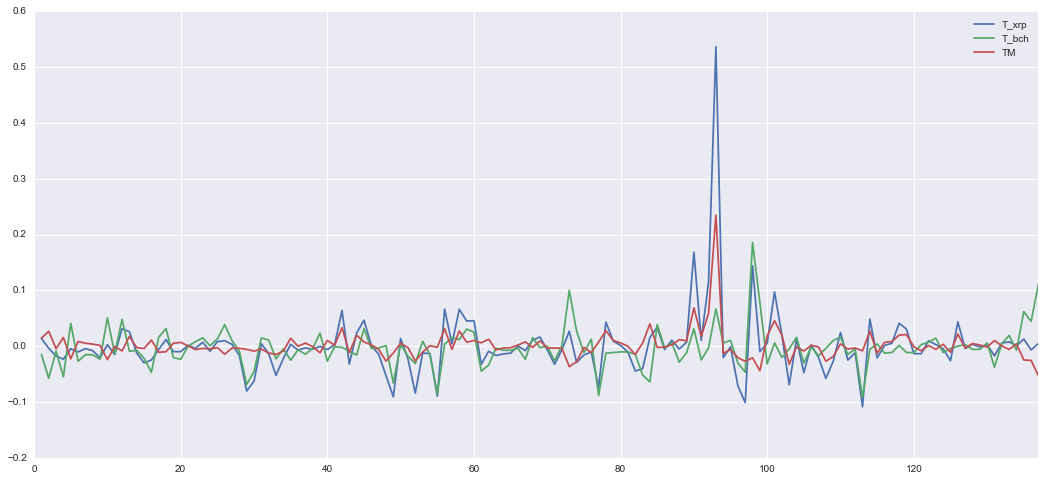

In [278]:
merged_tmsum[['T_xrp', 'T_bch', 'TM']].plot(figsize = (18, 8))

In [284]:
merged_tmsum['TMSUM'] = merged_tmsum['TM'].cumsum()

In [285]:
merged_tmsum

,time,close_xrp,T_xrp,close_bch,T_bch,TM,TMSUM
0,2018-06-20,0.000082,NaN,0.1346,NaN,NaN,NaN
1,2018-06-21,0.000083,0.013845,0.1326,-0.014859,0.014352,0.014352
2,2018-06-22,0.000082,-0.003746,0.1250,-0.057315,0.026785,0.041136
3,2018-06-23,0.000081,-0.017831,0.1239,-0.008800,-0.004516,0.036621
4,2018-06-24,0.000079,-0.023342,0.1171,-0.054883,0.015770,0.052391
5,2018-06-25,0.000079,-0.004426,0.1219,0.040991,-0.022708,0.029683
6,2018-06-26,0.000078,-0.010288,0.1186,-0.027071,0.008392,0.038074
7,2018-06-27,0.000078,-0.004363,0.1168,-0.015177,0.005407,0.043481
8,2018-06-28,0.000077,-0.007992,0.1150,-0.015411,0.003710,0.047191
9,2018-06-29,0.000075,-0.020790,0.1123,-0.023478,0.001344,0.048535


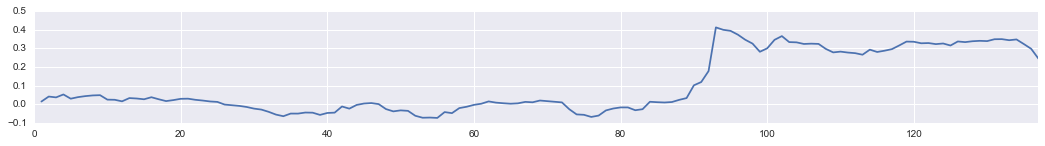

In [296]:
merged_tmsum['TMSUM'].plot(figsize = (18, 2))

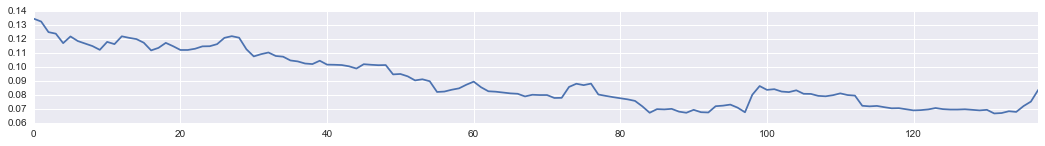

In [297]:
merged_tmsum['close_bch'].plot(figsize = (18, 2))

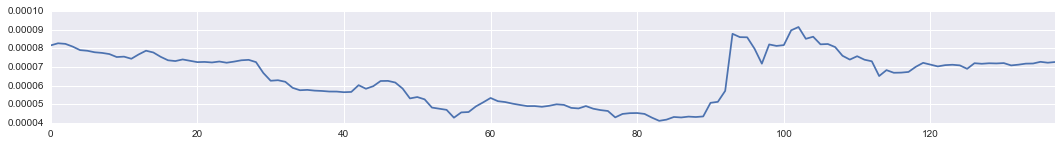

In [298]:
merged_tmsum['close_xrp'].plot(figsize = (18, 2))

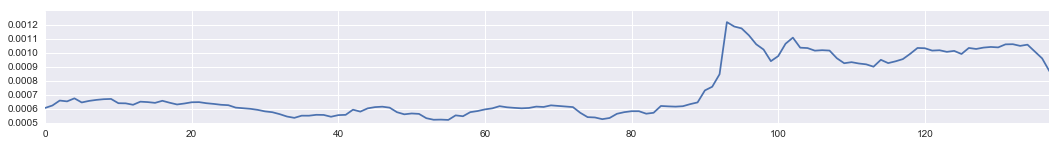

In [306]:
# 和之前的TMSUM相对较，这里确实证明了TMSUM越大，两个资产价格之间的距离也就越大
(merged_tmsum['close_xrp']/merged_tmsum['close_bch']).plot(figsize = (18, 2))

Functions to help export formatted ranking info from Pengfei's code

In [3]:
root_3 = "C:/Users/workspace/brad_public_workspace_on_win/SH_tongliang/data/"
rank = "11_8_rank_rest.csv"
rank = pd.read_csv(root_3+rank, encoding="latin-1", delimiter=',')

df = pd.DataFrame(rank.stack()).reset_index()

In [6]:
rank

,2018-11-8,2018-11-7,2018-11-6
0,XRP 7,BCH 7,BCH 7
1,BCH 6,XRP 6,XRP 6
2,EOS 5,ADA 5,ADA 5
3,ETH 4,ETH 4,LTC 4
4,ADA 3,TRX 3,ETH 3
5,BTC 2,EOS 2,TRX 2
6,TRX 1,LTC 1,EOS 1
7,LTC 0,BTC 0,BTC 0


In [4]:
df

,level_0,level_1,0
0,0,2018-11-8,XRP 7
1,0,2018-11-7,BCH 7
2,0,2018-11-6,BCH 7
3,1,2018-11-8,BCH 6
4,1,2018-11-7,XRP 6
5,1,2018-11-6,XRP 6
6,2,2018-11-8,EOS 5
7,2,2018-11-7,ADA 5
8,2,2018-11-6,ADA 5
9,3,2018-11-8,ETH 4


In [ ]:
del df['level_0']
df.columns = ['date', 'to_split']
df['asset'], df['rank'] = df['to_split'].str.split(' ', 1).str
del df['to_split']
df['rank'] = df['rank'].apply(lambda x: int(x))
pd.pivot_table(df, values='rank', columns='asset', index = 'date')